In [1]:
import pandas as pd
import geopandas as gpd 

import seaborn as sns 
import folium 

from matplotlib import pyplot as plt

In [2]:
sheet = pd.read_html('https://docs.google.com/spreadsheets/u/2/d/e/2PACX-1vRwAqp96T9sYYq2-i7Tj0pvTf6XVHjDSMIKBdZHXiCGGdNC0ypEU9NbngS8mxea55JuCFuua1MUeOj5/pubhtml#')

tests_state = sheet[1]

tests_state.columns = tests_state.iloc[0]

tests_state = tests_state.drop([0, 1])

tests_state = tests_state.drop(1.0, axis=1)

In [3]:
tests_state.head()

,State,Positive,Negative,Pending,Hospitalized,Death,Total,Last update (ET),Check time (ET)
2,AK,14,758,NaN,0,NaN,772,3/21 16:30,3/21 16:07
3,AL,124,28,NaN,NaN,0,152,3/21 11:20,3/21 14:35
4,AR,118,567,154,NaN,NaN,839,3/21 13:47,3/21 14:51
5,AS,NaN,NaN,NaN,NaN,0,0,3/19 00:00,3/21 15:00
6,AZ,104,290,122,NaN,1,516,3/21 00:00,3/21 15:11


In [4]:
state_names = pd.read_html('https://developers.google.com/public-data/docs/canonical/states_csv')[0]

In [5]:
states = gpd.read_file('gz_2010_us_040_00_5m.json')

In [6]:
states = states.merge(state_names, right_on='name', left_on='NAME')

In [7]:
states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",AL,32.318231,-86.902298,Alabama
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...",AK,63.588753,-154.493062,Alaska
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",AZ,34.048928,-111.093731,Arizona
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",AR,35.201050,-91.831833,Arkansas
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",CA,36.778261,-119.417932,California


In [8]:
tests = states.merge(tests_state, left_on='state', right_on='State')

tests.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name,State,Positive,Negative,Pending,Hospitalized,Death,Total,Last update (ET),Check time (ET)
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",AL,32.318231,-86.902298,Alabama,AL,124,28,NaN,NaN,0,152,3/21 11:20,3/21 14:35
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752...",AK,63.588753,-154.493062,Alaska,AK,14,758,NaN,0,NaN,772,3/21 16:30,3/21 16:07
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",AZ,34.048928,-111.093731,Arizona,AZ,104,290,122,NaN,1,516,3/21 00:00,3/21 15:11
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",AR,35.201050,-91.831833,Arkansas,AR,118,567,154,NaN,NaN,839,3/21 13:47,3/21 14:51
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",CA,36.778261,-119.417932,California,CA,1279,11249,NaN,NaN,24,12528,3/21 00:00,3/21 15:50


In [9]:
tests[['Positive', 'Negative', 'Total']] = tests[['Positive', 'Negative', 'Total']].apply(pd.to_numeric, axis=1)

In [10]:
tests['positive_ratio'] = tests['Positive'] / tests['Total']

In [11]:
tests = tests.to_crs(epsg=2163)

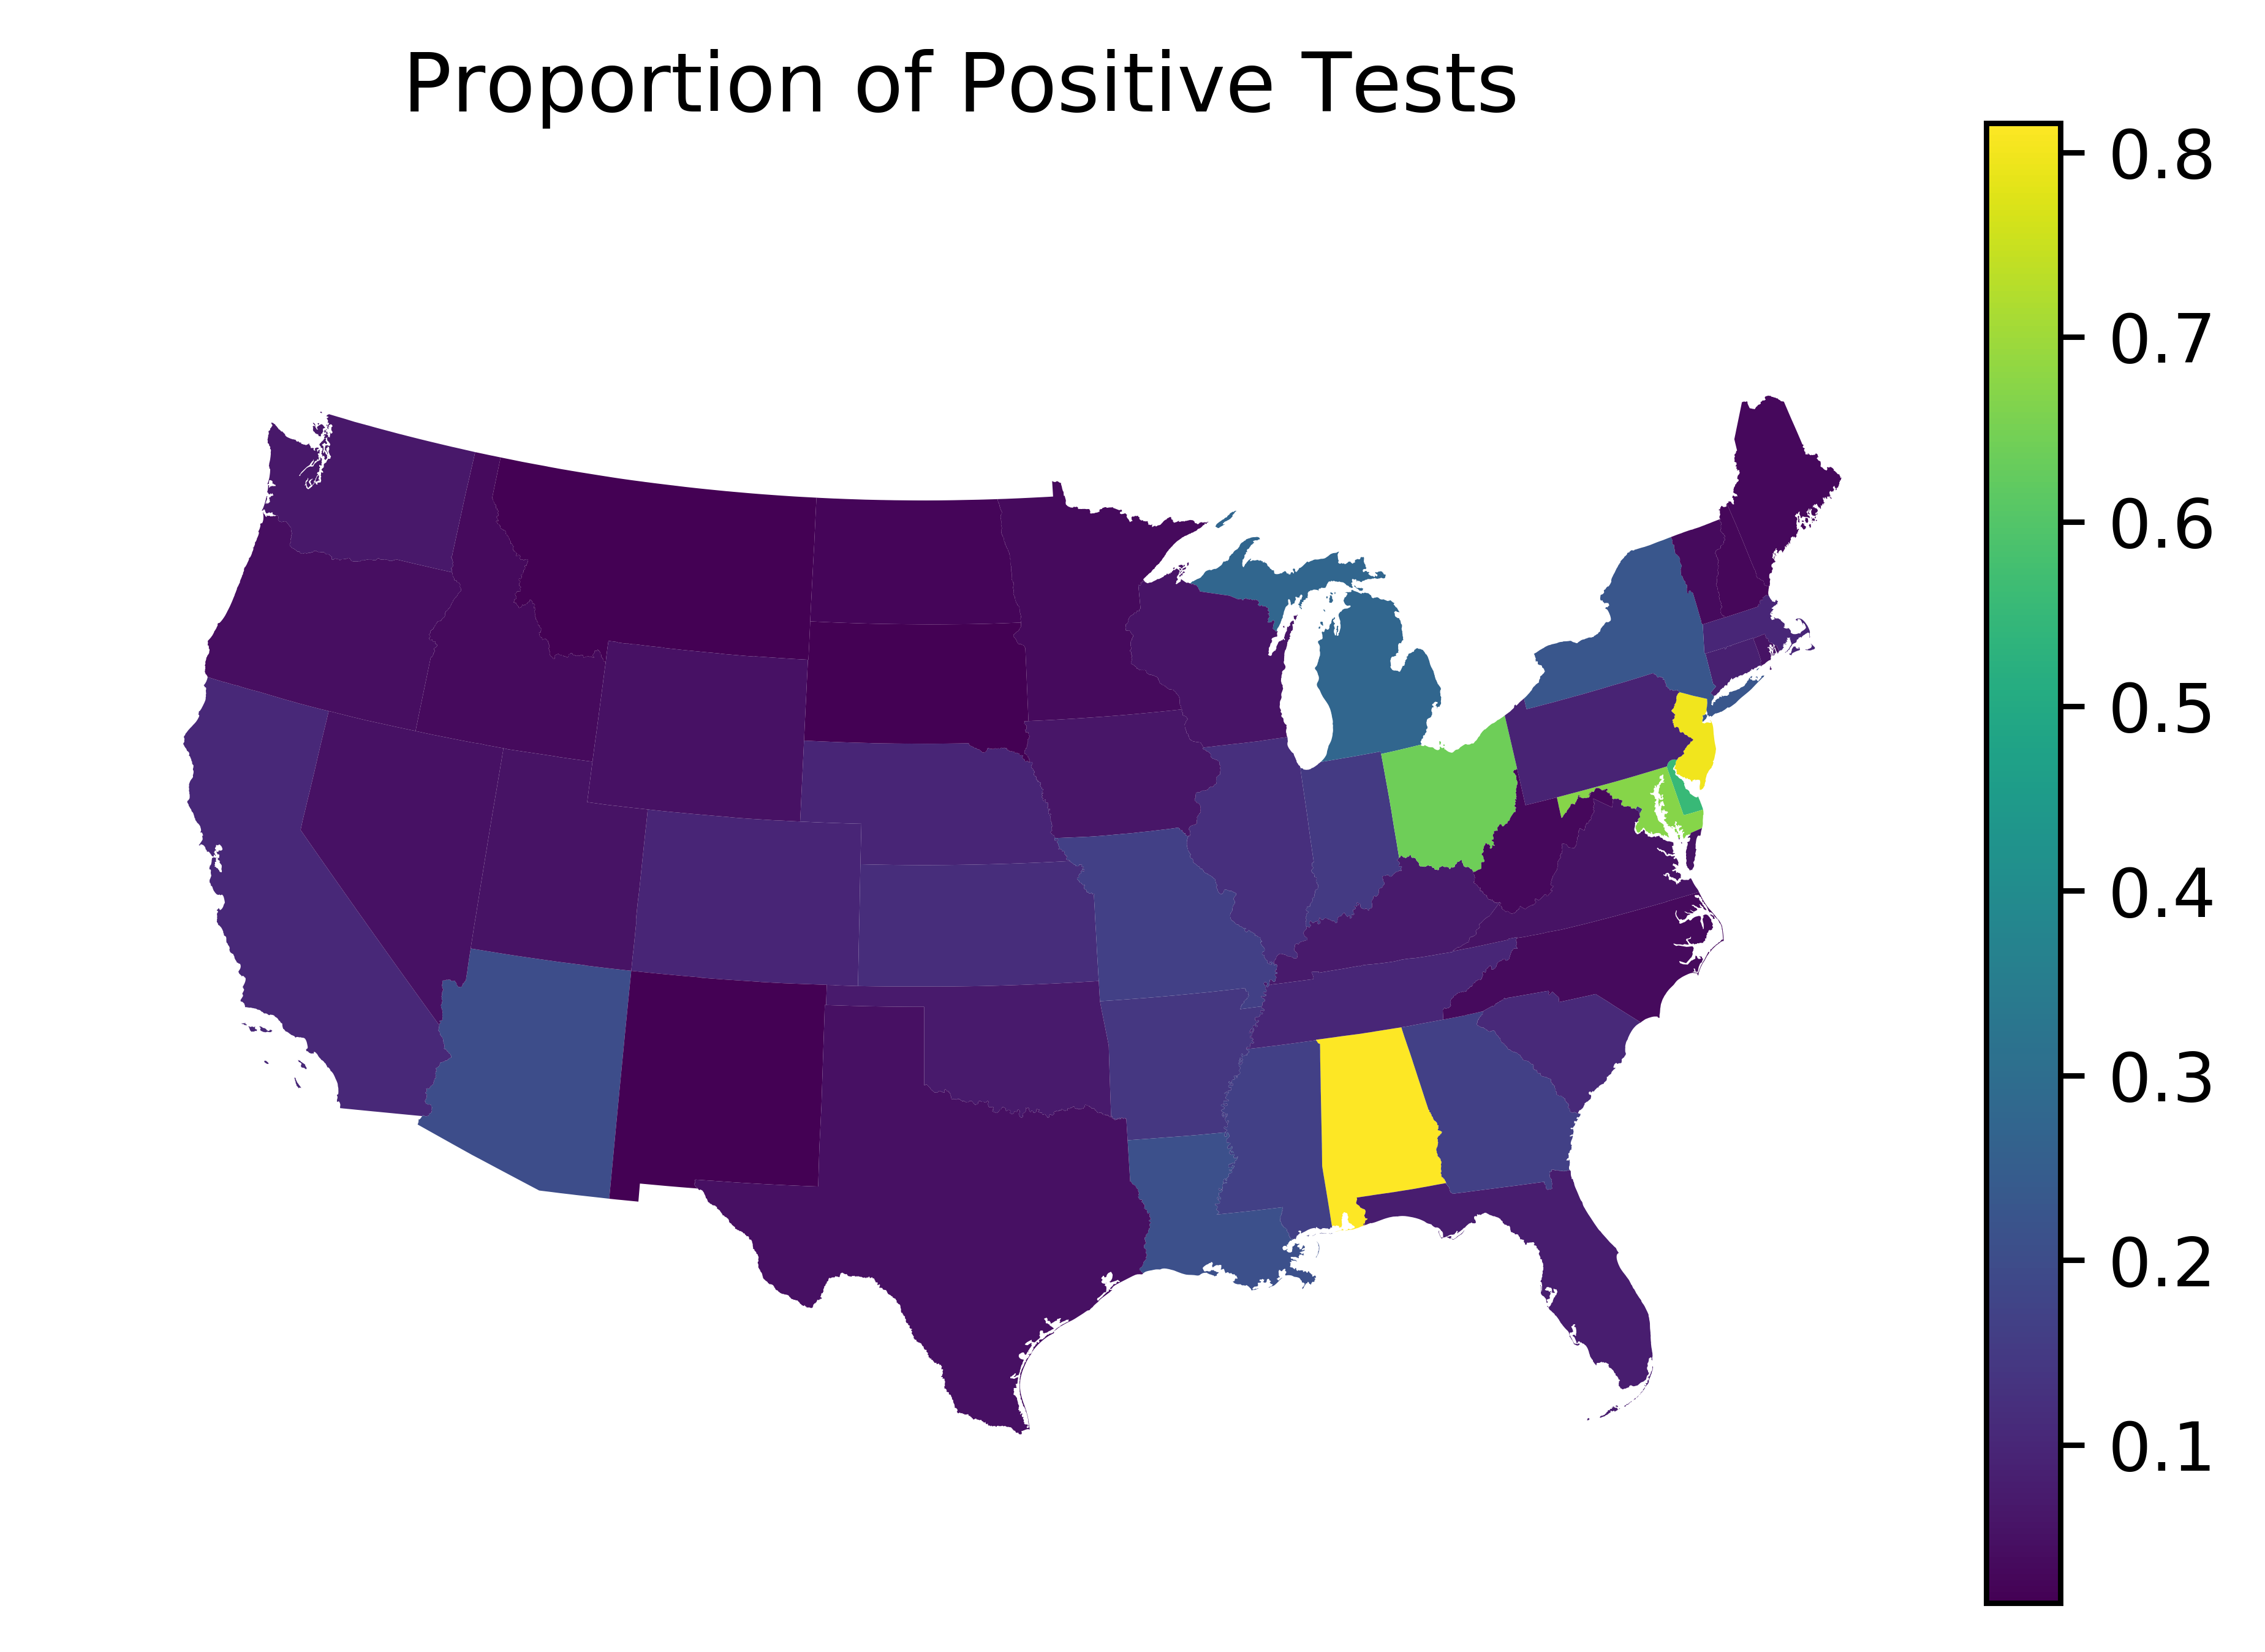

In [12]:
fig, ax = plt.subplots(dpi=800)

ax.axis('off')

ax.set_xlim(-2400000, 2600000)
ax.set_ylim(-2500000, 1400000)

ax.set_title('Proportion of Positive Tests')

tests.plot(column='positive_ratio', ax=ax, legend=True)

plt.savefig('us_positive_tests.png')

In [13]:
tests.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,latitude,longitude,name,State,Positive,Negative,Pending,Hospitalized,Death,Total,Last update (ET),Check time (ET),positive_ratio
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((1145349.139 -1553105.505, 1149...",AL,32.318231,-86.902298,Alabama,AL,124,28,NaN,NaN,0,152,3/21 11:20,3/21 14:35,0.815789
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-3671340.791 2756346.929, -367...",AK,63.588753,-154.493062,Alaska,AK,14,758,NaN,0,NaN,772,3/21 16:30,3/21 16:07,0.018135
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-1111065.933 -805474.753, -1110710.3...",AZ,34.048928,-111.093731,Arizona,AZ,104,290,122,NaN,1,516,3/21 00:00,3/21 15:11,0.201550
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((557903.093 -1310326.685, 557483.643 ...",AR,35.201050,-91.831833,Arkansas,AR,118,567,154,NaN,NaN,839,3/21 13:47,3/21 14:51,0.140644
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-1942660.918 -528577.162, -194...",CA,36.778261,-119.417932,California,CA,1279,11249,NaN,NaN,24,12528,3/21 00:00,3/21 15:50,0.102091


In [24]:
# change column names to have nicer display in map
tests = tests.drop('State', axis=1).rename({'NAME': 'State'}, axis=1)

census = pd.read_csv('nst-est2019-alldata.csv')
tests = tests.merge(census[['NAME', 'POPESTIMATE2019']], how='left', left_on='State', right_on='NAME')
tests = tests.rename({'POPESTIMATE2019': 'Population in 2019'}, axis=1)

In [25]:
m = folium.Map(tiles='CartoDB positron',
               zoom_start=4,
               location=(39.8283, -98.5795))

In [26]:
cp = folium.Choropleth(tests,
                  data=tests, 
                  key_on='feature.properties.GEO_ID',
                  fill_color='YlOrRd', 
                  columns=['GEO_ID', 'positive_ratio'],
                  legend_name='Proportion of Positive Test Results (from total number of tests in each state)').add_to(m)

cp.geojson.add_child(
    folium.features.GeoJsonTooltip(['State', 'Positive', 'Negative', 'Total', 'Population in 2019'])
);

In [27]:
m.save('map.html')